In [226]:
import warnings
warnings.filterwarnings('ignore')

### Import lib

In [227]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

### Physical constants

In [228]:
hbar = sp.constants.hbar
m = sp.constants.electron_mass
eV = sp.constants.electron_volt

### Transmission probability calculator (Matrix)

In [229]:
def T_fn(V0, E, L):
  V0_ev = V0 * eV
  E_ev = E * eV

  k1 = np.sqrt((2*m*E_ev) / (hbar**2))
  k2 = np.sqrt(((2*m) * (V0_ev-E_ev)) / (hbar**2))

  scalar_lambda_1 = 1/2
  scalar_lambda_2 = np.exp((1j)*k1*L)/2

  alpha_c1 = 1-((1j)*k2/k1)
  alpha_c2 = 1+((1j)*k2/k1)

  '''M_hat_alpha = np.array([
      [(alpha_c1), (alpha_c2)],
      [(alpha_c2), (alpha_c1)]
  ], dtype=np.complex128
  )'''

  beta_c1 = (1+((1j)*k1/k2)) * np.exp(-k2*L)
  beta_c2 = (1-((1j)*k1/k2)) * np.exp(k2*L)

  '''M_hat_beta = np.array([
      [(beta_c1), (0)],
      [(beta_c2), (0)]
  ], dtype=np.complex128
  )

  O_hat = M_hat_alpha @ M_hat_beta'''

  O_11 = (alpha_c1*beta_c1) + (alpha_c2*beta_c2)

  amplitude = 1/(scalar_lambda_1 * scalar_lambda_2 * O_11)
  T = np.pow(np.abs(amplitude), 2)

  return T

### Transmission probability (T) vs Barrier width (L)

#### Parameters

In [230]:
V0 = 1
E = 0.7
L_list = np.linspace(1e-12, 20e-9, 1000000)

In [231]:
T = T_fn(V0, E, L_list)

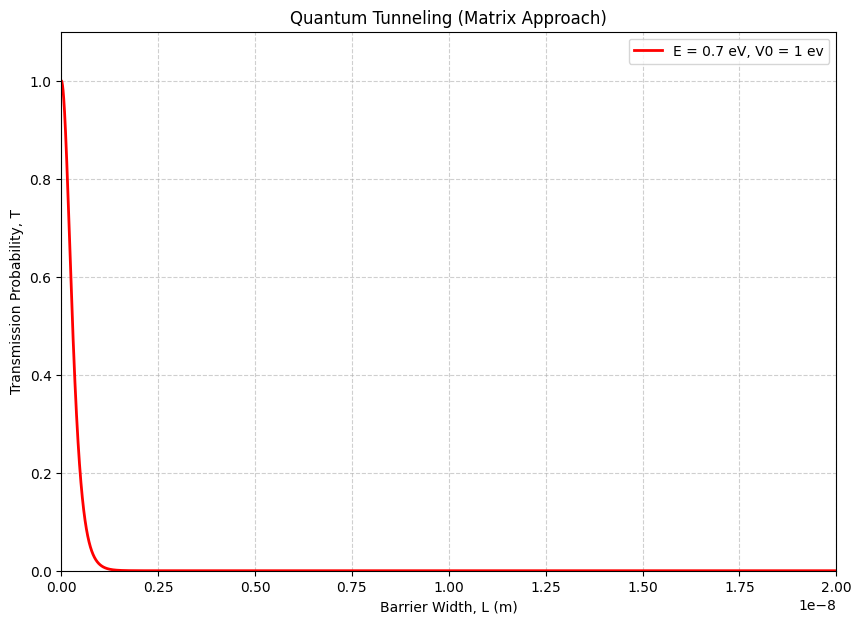

In [232]:
plt.figure(figsize=(10, 7))
plt.plot(L_list, T, label=f'E = {E} eV, V0 = {V0} ev', lw=2, color='red')

plt.title('Quantum Tunneling (Matrix Approach)')
plt.xlabel('Barrier Width, L (m)')
plt.ylabel('Transmission Probability, T')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.ylim(0, 1.1)
plt.xlim(0, L_list.max())
plt.savefig('matrix_T_L.png', dpi=200)

### Transmission probability (T) vs Barrier height (V0)

#### Parameters

In [233]:
E = 0.7
V0_list = np.linspace(E+1e-12, 20, 1000000)
L = 1e-10

In [234]:
T = T_fn(V0_list, E, L)

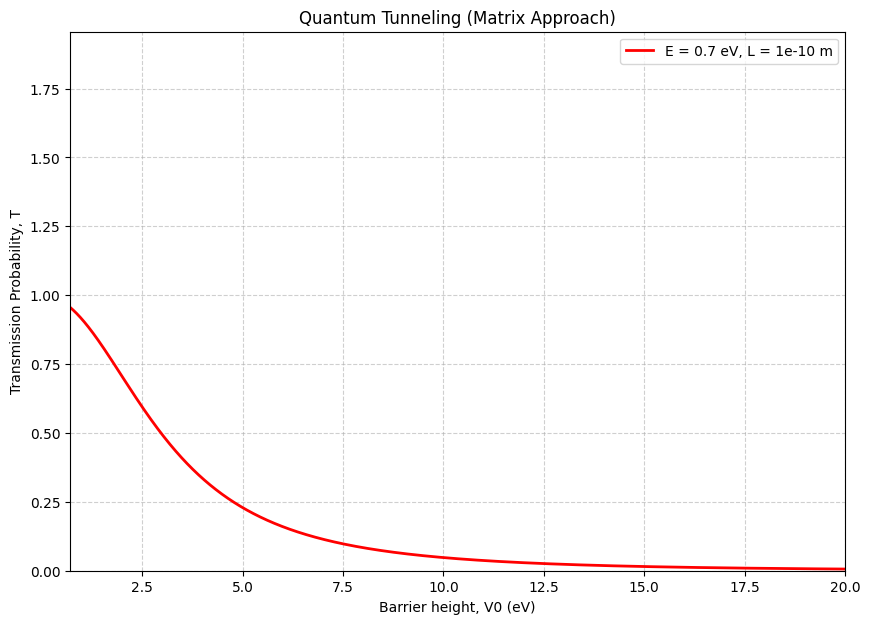

In [235]:
plt.figure(figsize=(10, 7))
plt.plot(V0_list, T, label=f'E = {E} eV, L = {L} m', lw=2, color='red')

plt.title('Quantum Tunneling (Matrix Approach)')
plt.xlabel('Barrier height, V0 (eV)')
plt.ylabel('Transmission Probability, T')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.ylim(0, T.max()+1)
plt.xlim(V0_list.min(), V0_list.max())
plt.savefig('matrix_T_V0.png', dpi=200)

### Transmission probability (T) vs Incident particle energy (E)

#### Parameters

In [236]:
V0 = 1
E_list = np.linspace(1e-12, V0-1e-12, 1000000)
L = 1e-10

In [237]:
T = T_fn(V0, E_list, L)

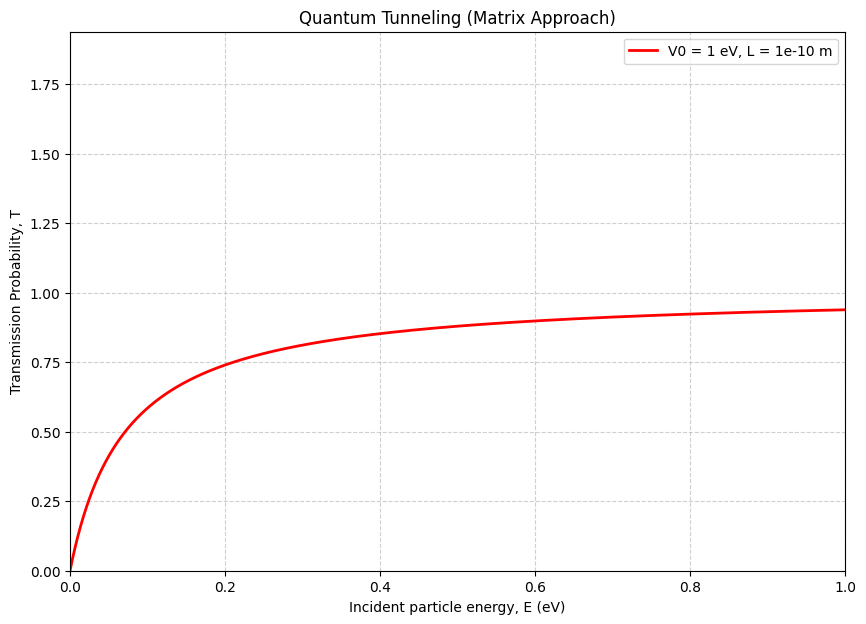

In [238]:
plt.figure(figsize=(10, 7))
plt.plot(E_list, T, label=f'V0 = {V0} eV, L = {L} m', lw=2, color='red')

plt.title('Quantum Tunneling (Matrix Approach)')
plt.xlabel('Incident particle energy, E (eV)')
plt.ylabel('Transmission Probability, T')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.ylim(0, T.max()+1)
plt.xlim(E_list.min(), E_list.max())
plt.savefig('matrix_T_E.png', dpi=200)